# Creating Cohorts of Songs

## Problem Scenario:

The customer always looks forward to specialized treatment, whether shopping on an e-commerce website or watching Netflix. The customer desires content that aligns with their preferences. To maintain customer engagement, companies must consistently provide the most relevant information. Starting with Spotify, a Swedish audio streaming and media

service provider, boasts over 456 million active monthly users, including more than 195 million paid subscribers as of September 2022. The company aims to create cohorts of different songs to enhance song recommendations. These cohorts will be based on various relevant features, ensuring that each group contains similar types of songs.

### Problem Objective:

As a data scientist, you should perform exploratory data analysis and cluster analysis to create cohorts of songs. The goal is to better understand the various factors that create a cohort of songs.

In [37]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "7"

def make_pretty(styler):
    styler.set_caption("Top 2 Albums")
    styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
    return styler

### Steps to Perform:

1.	Initial data inspection and data cleaning:
    a.	Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries and rectify them as needed.
    
2.	Refine the data for further processing based on your findings

In [39]:
#Reading and Inspecting data
df = pd.read_csv('rolling_stones_spotify.csv')

# Inspecting the first few rows of the DataFrame
print(df.head())

# Displaying the last few rows of the DataFrame
#print(df.tail())

# Providing information about the DataFrame, including data types and non-null counts
print(df.info())


   Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy 

In [40]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


In [41]:
# Find duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)

# Removing duplicate records
df_no_duplicates = df.drop_duplicates()

Empty DataFrame
Columns: [Unnamed: 0, name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []


**a.	Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album.**

Tracks are filter out based on criteria where popularity score>0


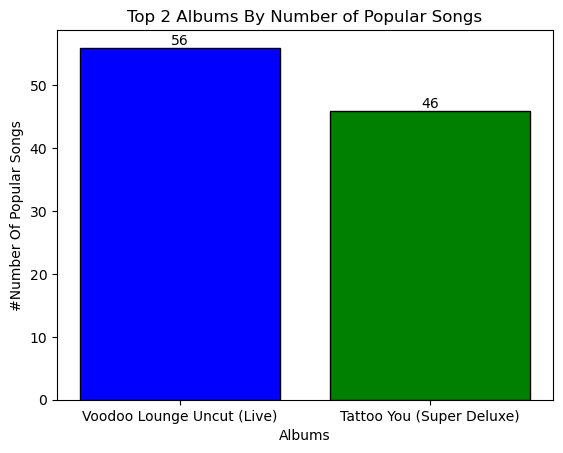

,album,NoOfPopularSongs,SumOfPopularity
0,Voodoo Lounge Uncut (Live),56,654
1,Tattoo You (Super Deluxe),46,1008


In [43]:
# Filtering Album based on popularilty score, keeping where score greater than 0
dfpopular= df[df['popularity'] > 0].copy()

result = dfpopular.groupby(['album']).agg(
    NoOfPopularSongs=('popularity', 'count'),
    SumOfPopularity=('popularity', 'sum'),
   )

Top5Album_df=result.sort_values(['NoOfPopularSongs'],ascending=False).head(2).reset_index()
print("Tracks are filter out based on criteria where popularity score>0") 
#print(Top5Album_df)

# Create a bar chart
colors = ['blue', 'green', 'orange'] 
b=plt.bar(Top5Album_df['album'],Top5Album_df['NoOfPopularSongs'],edgecolor='black',color=colors)

# Add Labels
plt.xlabel('Albums')
plt.ylabel('#Number Of Popular Songs')
plt.bar_label(b)
plt.title('Top 2 Albums By Number of Popular Songs')

# Show the plot
plt.show()

Top5Album_df.style.pipe(make_pretty)


**b.	Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns**

In [45]:
# Displaying descriptive statistics of the DataFrame, such as mean, std, min, max, and so on.
print(df.describe())

        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.2334

**c.	Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved**

In [47]:
#Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved
dfcor=df[['acousticness','energy','liveness','loudness','speechiness','tempo','valence','popularity','danceability','instrumentalness']].copy()
#dfcor=dfcor[dfcor['speechiness']<=0.33]
print('Corelation between features')
dfcor.corr()

Corelation between features


,acousticness,energy,liveness,loudness,speechiness,tempo,valence,popularity,danceability,instrumentalness
acousticness,1.000000,-0.363819,-0.117739,-0.237083,-0.021774,-0.171003,-0.138803,0.108046,0.070017,0.061403
energy,-0.363819,1.000000,0.511188,0.698039,0.417214,0.201885,0.046217,-0.057272,-0.300536,0.120261
liveness,-0.117739,0.511188,1.000000,0.327036,0.400018,0.108855,-0.347451,-0.205845,-0.516387,0.008873
loudness,-0.237083,0.698039,0.327036,1.000000,0.189904,0.112837,-0.027571,0.156323,-0.249406,0.012524
speechiness,-0.021774,0.417214,0.400018,0.189904,1.000000,0.192687,-0.399751,-0.136745,-0.322684,0.009586
tempo,-0.171003,0.201885,0.108855,0.112837,0.192687,1.000000,0.000558,-0.061061,-0.324398,0.010961
valence,-0.138803,0.046217,-0.347451,-0.027571,-0.399751,0.000558,1.000000,0.065333,0.546210,0.103480
popularity,0.108046,-0.057272,-0.205845,0.156323,-0.136745,-0.061061,0.065333,1.000000,0.141205,-0.010612
danceability,0.070017,-0.300536,-0.516387,-0.249406,-0.322684,-0.324398,0.546210,0.141205,1.000000,-0.031812
instrumentalness,0.061403,0.120261,0.008873,0.012524,0.009586,0.010961,0.103480,-0.010612,-0.031812,1.000000


**Observations**
1. Popularity:- There is no significant corelation identified between popularity with other features.
2. Energy->loudness,liveness,tempo,accoustic,danceability:- There is positive correlation identified with loudness(.70), liveness(.51) and tempo(.20) whereas negativw correlation identified with danceability(-.30) and accoustic (-.36).
3. Valence-> Danceability:- There is positive correlation (.55) identified with danceability

**d.	Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations**

##### Dimensions Reduction Techniques

Dimensionality reduction involves decreasing the number of features (or dimensions) in a dataset while preserving as much information as possible. This technique is used for various purposes, such as simplifying a model, enhancing the performance of a learning algorithm, or making the data easier to visualize.
1. Improves computational efficiency: Reduces the computational cost for data processing and model training.
2. Mitigates the curse of dimensionality: Simplifies data to prevent overfitting and sparsity issues.
3. Reduces noise in data: Eliminates irrelevant or noisy features to enhance model performance.
4. Enhances data visualization: Makes high-dimensional data easier to visualize in 2D or 3D.
5. Boosts model performance: Focuses on the most relevant features for better accuracy.
6. Saves storage and memory: Decreases the amount of storage and memory needed for large datasets.
7. Increases model interpretability: Simplifies models, making them easier to understand and explain.
8. Avoids multicollinearity: Addresses high correlation between features to improve regression models.

There are two ways implement this technique.

**Feature selection** is the process of choosing a subset of relevant features and discarding irrelevant ones from a dataset to build a more accurate model. Essentially, it involves selecting the most optimal features from the input data.

**Feature extraction** is the process of transforming high-dimensional data into a lower-dimensional space. This approach is useful for retaining essential information while using fewer resources for processing.

Cluster analysis results are visualized using PCA below;-

**4.	Perform cluster analysis**

    a.	Identify the right number of clusters.
    b.	Use appropriate clustering algorithms
    c.	Define each cluster based on the features


Silhoute Score Method Used: 4
Optimal Clusters Identified by silhoute score: 4


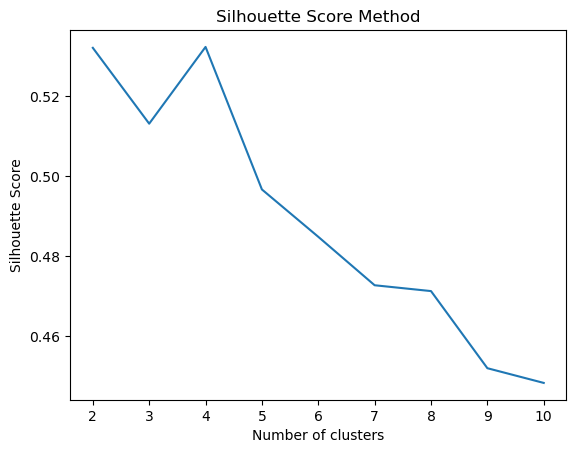

,energy,liveness,speechiness,loudness,tempo
0,0.993,0.932,0.1100,-12.913,118.001
1,0.965,0.961,0.0759,-4.803,131.455
2,0.969,0.956,0.1150,-4.936,130.066
3,0.985,0.895,0.1930,-5.535,132.994
4,0.969,0.966,0.0930,-5.098,130.533
5,0.956,0.741,0.0915,-5.539,101.628
6,0.810,0.972,0.0969,-6.851,77.520
7,0.971,0.993,0.0873,-5.509,128.958
8,0.942,0.959,0.1190,-6.018,139.452
9,0.944,0.974,0.1280,-5.074,119.782


In [52]:
# Identify the right number of clusters
#from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Silhouette Score method
columstoscale=['energy','liveness','speechiness','loudness','tempo']
X=df[columstoscale].copy()


silhouette_scores = []
for i in range(2, 11):
    model = KMeans(n_clusters=i, n_init=10,  init='k-means++', random_state=42)
    model.fit(X)
    score = silhouette_score(X, model.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

# Select the number of clusters with the highest silhouette score
optimal_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print("Silhoute Score Method Used:",optimal_clusters)
print("Optimal Clusters Identified by silhoute score:",optimal_clusters)

plt.show()
X.head(10)

In [53]:
#KMeans clustering used
# Fit the model with the optimal number of clusters
model = KMeans(n_clusters=optimal_clusters, n_init=15, init='k-means++', random_state=42)
y_kmeans = model.fit_predict(X)
print('KMeans clustering used')

KMeans clustering used


In [54]:
#Saving the cluster data
df['cluster']=model.labels_
#df.drop([0:1])
df.to_csv('rolling_stones_spotify_clusters.csv')
print("Data with Cluster Assigned Saved")
df.head()

Data with Cluster Assigned Saved


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,cluster
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,0
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,1
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,1
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,1
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,1


## Clustering Result Analysis

Using Silhouette Score method, number of optimal clusters identified to 4 based on 5 features (energy	liveness	speechiness	loudness	tempo)

After observing the clustering results, cluster distribution is more influenced by tempo. Tempo can be encoded into more clearer group (Slow 0, Medium 1, Fast 2).

1. Cluster 0 # High Energy, Moderate Tempo (<127)
2. Cluster 1 # High Energy, Fast Tempo (<160 and >127)
3. Cluster 2 # High Energy, Very fast Tempo (>160)
4. Cluster 3 # High-Low Energy, Low Tempo (<99)

***Tempo is a fundamental aspect of music that dictates how fast or slow a piece should be performed. It serves as the heartbeat of music, influencing the mood, style, and overall expression of a composition. A piece played at a fast tempo can evoke excitement, while a slow tempo may convey calmness or sadness.

Tempo refers to the speed of a song, expressed in BPM (beats per minute).Tempo is tightly linked with perceived energy, mood, and activity suitability of music. Tempo helps differentiate songs into pace categories such as slow ballads, mid-tempo grooves, or fast-paced dance tracks.

For example:
1. Slow tempos: 0-79 BPM
2. Medium tempos: 80-129 BPM
3. Fast tempos: 130+ BPM

**Visualizing Cluster Analysis results using PCA**

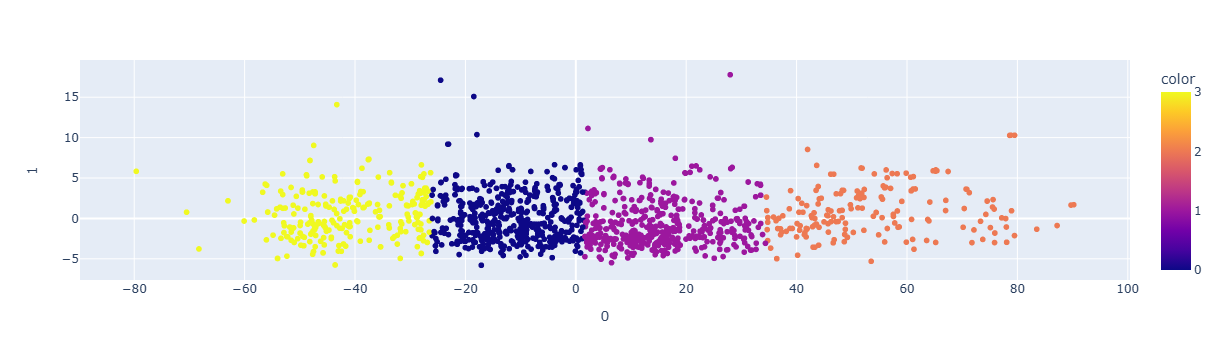

In [57]:
#Visualizing cluster data using PCA
import plotly.express as px
from sklearn.decomposition import PCA

X = df[columstoscale]
pca = PCA(n_components=5)
components = pca.fit_transform(X)
fig = px.scatter(components, x=0, y=1, color=df['cluster'])
fig.show()